<a href="https://colab.research.google.com/github/trungsi/DS-project---Road-accidents-in-France/blob/master/Linear_regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/DataScience project/Road accidents - model.csv', 'r', encoding='ISO-8859-1') as f:
  df = pd.read_csv(f, index_col=0)

df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-56-4b98f2bad7af>:6: DtypeWarning: Columns (5,11,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, index_col=0)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034545 entries, 0 to 1034544
Data columns (total 24 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Num_Acc     1034545 non-null  int64  
 1   an          1034545 non-null  int64  
 2   mois        1034545 non-null  int64  
 3   jour        1034545 non-null  int64  
 4   hrmn        1034545 non-null  object 
 5   lum         1034545 non-null  int64  
 6   agg         1034545 non-null  int64  
 7   int         1034545 non-null  int64  
 8   atm         1034472 non-null  float64
 9   col         1034526 non-null  float64
 10  com         1034545 non-null  object 
 11  adr         908057 non-null   object 
 12  gps         453015 non-null   object 
 13  lat         607560 non-null   object 
 14  long        607556 non-null   object 
 15  dep         1034545 non-null  object 
 16  grav_mean   1034545 non-null  float64
 17  grav_total  1034545 non-null  int64  
 18  nb_usagers  1034545 no

In [57]:
# to show full float values instead of exponential format
pd.set_option('float_format', '{:f}'.format)
print(df.head())
print(df.grav_mean.describe())

        Num_Acc  an  mois  jour  hrmn  lum  agg  int      atm      col  ...  \
0  200600000001   6     1     4  1545    1    2    2 1.000000 3.000000  ...   
1  200600000002   6     1     6   805    2    2    2 4.000000 3.000000  ...   
2  200600000003   6     1     9  1340    1    2    1 1.000000 6.000000  ...   
3  200600000004   6     1    10  1625    2    2    1 8.000000 3.000000  ...   
4  200600000005   6     1    24  1120    1    1    1 1.000000 2.000000  ...   

  long dep grav_mean grav_total nb_usagers        date  nb_jour  nb_semaine  \
0  NaN  10  2.000000          3          6  2006-01-04        4           1   
1  NaN  10  3.000000          2          6  2006-01-06        6           1   
2  NaN  10  3.500000          2          7  2006-01-09        9           2   
3  NaN  10  1.500000          2          3  2006-01-10       10           2   
4  NaN  10  1.500000          2          3  2006-01-24       24           4   

      surf vma  
0 1.000000 NaN  
1 2.000000 NaN  

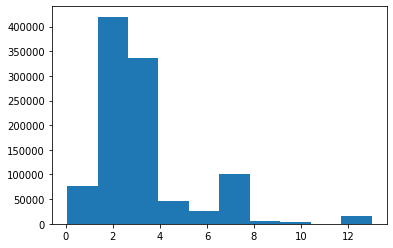

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(df.grav_mean);

# mean gravity varies from 0 to 13 with mean around 3 and majority (75%) are less than 4

# Data is skewed

In [59]:
# remove columns not useful for the model
df = df.drop(columns=['Num_Acc', 'an', 'mois', 'jour', 'hrmn', 'adr', 'gps', 'lat', 'long', 'com', 'grav_total', 'date', 'nb_jour', 'nb_semaine', 'vma'])
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032546 entries, 0 to 1034544
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   lum         1032546 non-null  int64  
 1   agg         1032546 non-null  int64  
 2   int         1032546 non-null  int64  
 3   atm         1032546 non-null  float64
 4   col         1032546 non-null  float64
 5   dep         1032546 non-null  object 
 6   grav_mean   1032546 non-null  float64
 7   nb_usagers  1032546 non-null  int64  
 8   surf        1032546 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 78.8+ MB


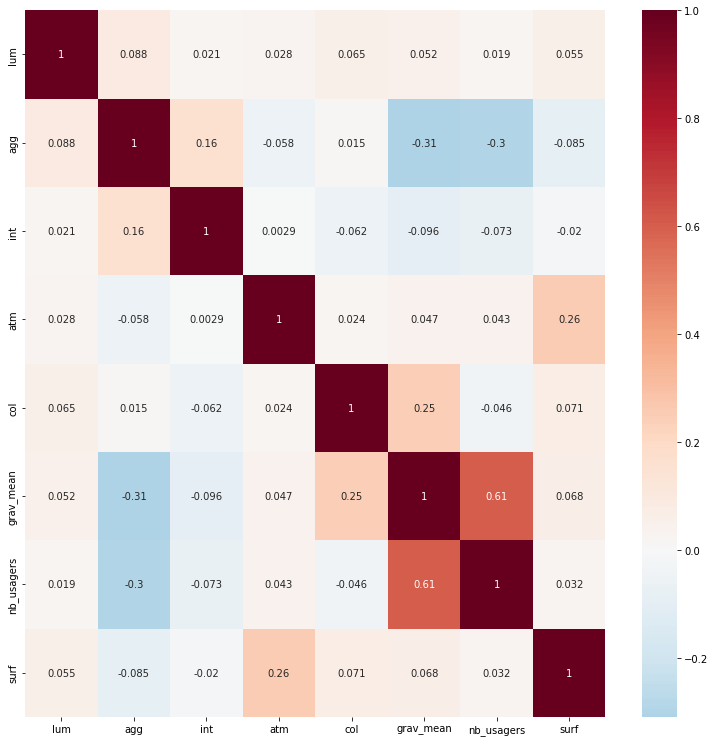

In [60]:
import seaborn as sns

plt.figure(figsize=(13,13))
sns.heatmap(df.corr(),  annot=True, cmap="RdBu_r", center =0);

# Number of usagers is highly influent on gravity. 
# The Location (agglomeration or hors agglomeration) is the second most important feature. 
# Collision type comes next as the third important feature.
# All other features are not important. Can they be excluded from the model ?

In [54]:
# convert categorical variables which are currently encoded as numeric to string type
# only nb_usagers is numeric
df = df.astype({'lum' : 'str', 'agg': 'str', 'int': 'str', 'atm': 'str', 'col': 'str', 'surf': 'str'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032546 entries, 0 to 1034544
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   lum         1032546 non-null  object 
 1   agg         1032546 non-null  object 
 2   int         1032546 non-null  object 
 3   atm         1032546 non-null  object 
 4   col         1032546 non-null  object 
 5   dep         1032546 non-null  object 
 6   grav_mean   1032546 non-null  float64
 7   nb_usagers  1032546 non-null  int64  
 8   surf        1032546 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 78.8+ MB


In [28]:
# convert categorical variables to numeric using dummy
df = pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032546 entries, 0 to 1034544
Columns: 158 entries, grav_mean to surf_9.0
dtypes: float64(1), int64(1), uint8(156)
memory usage: 177.2 MB


In [29]:
df.head()

,grav_mean,nb_usagers,lum_-1,lum_1,lum_2,lum_3,lum_4,lum_5,agg_1,agg_2,...,surf_0.0,surf_1.0,surf_2.0,surf_3.0,surf_4.0,surf_5.0,surf_6.0,surf_7.0,surf_8.0,surf_9.0
0,2.000000,6,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,3.000000,6,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,3.500000,7,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1.500000,3,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1.500000,3,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [30]:
# separation of features and target variables
target = df.grav_mean
feats = df.drop(columns=['grav_mean'])

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.2, random_state=123)

In [32]:
# try with simple linear regression
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_train, y_train)

print("Coefficient of determination of the model on train data:", slr.score(X_train, y_train))
print("Coefficient of determination of the model on test data:", slr.score(X_test, y_test))

Coefficient of determination of the model on train data: 0.5294050899117094
Coefficient of determination of the model on test data: 0.5408991194317183


# The score (R2) is not so good with simple model

In [35]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

scores = cross_validate(slr, X_train, y_train, cv=5, return_train_score=True)
print(scores)
print(scores['test_score'].mean())


{'fit_time': array([23.66366601, 19.28670454, 19.35664582, 19.13883138, 19.11957884]), 'score_time': array([0.23652864, 0.27649164, 0.35503483, 0.29004431, 0.34035158]), 'test_score': array([ 5.19761447e-01,  5.12210857e-01,  5.39311224e-01,  5.36913925e-01,
       -5.53021794e+15]), 'train_score': array([0.53178522, 0.53354941, 0.52687569, 0.52745987, 0.52768054])}
-1106043587812721.4


In [37]:
y_train_pred = slr.predict(X_train)
import math
print('RMSE= ', math.sqrt(((y_train_pred - y_train)**2).mean()))

RMSE=  1.550003240223129


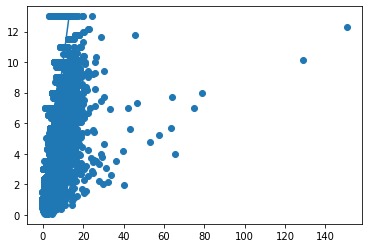

In [40]:
plt.scatter(y_train_pred, y_train)
plt.plot((y_train.min(),y_train.max()), (y_train.min(),y_train.max()))

In [47]:
import numpy as np
print(np.percentile(y_train, q=[0, 25, 50, 75, 100]))
print(np.percentile(y_train_pred, q=[0, 25, 50, 75, 100]))

[ 0.05357143  1.5         3.          3.5        13.        ]
[ -0.33224487   1.97434998   2.8506012    3.92730713 150.45300293]


In [39]:
from sklearn.feature_selection import f_regression
f_regression(X_train, y_train)

(array([4.71472244e+05, 2.15297228e-01, 1.08122629e+04, 4.52953371e+02,
        3.80587590e+04, 1.04291157e+02, 7.98628224e+02, 8.59487415e+04,
        8.59487415e+04, 5.32756568e-01, 8.76137631e-01, 2.63121970e+04,
        1.19239605e+04, 7.34387275e+03, 7.27254536e+02, 1.61662295e+03,
        2.81826546e+02, 1.09392241e+03, 1.20881768e+02, 2.72871591e+00,
        7.09507913e-01, 5.04455520e+02, 2.19859573e+02, 9.60314822e+01,
        8.68973585e+01, 1.76633023e+03, 5.40603863e+02, 2.26448712e+02,
        2.48658905e+02, 8.34789250e+02, 1.27694153e+02, 4.43850763e+03,
        1.78837772e+04, 3.52407659e+04, 1.30658499e+04, 3.42509644e+03,
        2.49015612e+04, 4.73701571e+04, 5.35734717e+01, 1.35592736e+02,
        1.19462433e+02, 9.01492968e+01, 4.10144949e-01, 3.92839943e+00,
        7.10951162e+01, 9.89364597e+01, 1.78678069e+01, 1.09610272e+03,
        2.48121423e+02, 7.59662841e+02, 8.96395198e+02, 3.52018726e+02,
        3.71411980e+02, 1.03042641e+03, 5.24175546e+01, 2.965666

In [ ]:
from sklearn.linear_model import RidgeCV

ridge_reg = RidgeCV(alphas=[0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100])

ridge_reg.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-03, 1.e-02, 1.e-01, 3.e-01, 7.e-01, 1.e+00, 1.e+01, 5.e+01,
       1.e+02]))

In [ ]:
print(ridge_reg.alpha_)
print(ridge_reg.score(X_train, y_train))
print(ridge_reg.score(X_test, y_test))

50.0
0.5294094589242764
0.5409115690027483


In [ ]:
from sklearn.linear_model import LassoCV
model_lasso = LassoCV(cv=10)
model_lasso.fit(X_train, y_train)

LassoCV(cv=10)

In [ ]:
print(model_lasso.score(X_train, y_train))
print(model_lasso.score(X_test, y_test))

0.521419815759032
0.5342465664380286
